# Principal Component Analysis: Data Visualisation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris 
%matplotlib inline

# Loading Iris Database

In [36]:
# load dataset into dataframe
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                 , header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [37]:
# show the last 5 lines of the table
df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [85]:
# save dataframe as latex file
with open('X_original.tex', 'w') as tf:
     tf.write(df.to_latex())

In [38]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# Standardise

In [39]:
# fits data onto an unit scale (mean=0, variance=1)

X_std = StandardScaler().fit_transform(X)

In [91]:
df = pd.DataFrame(data = X_std, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df.tail()

,sepal length,sepal width,petal length,petal width
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956
149,0.068662,-0.124958,0.762759,0.790591


In [92]:
# save dataframe as latex file
with open('X_std.tex', 'w') as tf:
     tf.write(df.to_latex())

# Calculating the Principal Components

There are two main ways that the eigenvectors that correspond to each principical component are calculated: eigendecomposition of the correlation matrix and singular value decomposition. Since SVD improves the computational efficiency of the process, most PCA implementations utilise the SVD method. I will show both methods to compare the results and to show they will be the same.

## Correlation Matrix

In [100]:
cor_mat = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print("Eigenvectors \n %s" %eig_vecs.round(2))
print("\n")
print("Eigenvalues \n %s" %eig_vals.round(2))

Eigenvectors 
 [[ 0.52 -0.37 -0.72  0.26]
 [-0.26 -0.93  0.24 -0.12]
 [ 0.58 -0.02  0.14 -0.8 ]
 [ 0.57 -0.07  0.63  0.52]]


Eigenvalues 
 [2.91 0.92 0.15 0.02]


## Singular Value Decomposition

As you can see, the results for both the SVD method and the correlation matrix method are the same.

In [101]:
u,s,v = np.linalg.svd(X_std.T)
u.round(2)

array([[-0.52, -0.37,  0.72,  0.26],
       [ 0.26, -0.93, -0.24, -0.12],
       [-0.58, -0.02, -0.14, -0.8 ],
       [-0.57, -0.07, -0.63,  0.52]])

# Sort the Eigenpairs

In order to decide which eigenvectors can be removed without losing too much of the original information, you must choose eigenvectors which correspond to the largest eigenvalues of the dataset matrix. The eigenvectors with the lowest eigenvalues can be removed without losing much information.
Therefore, we will rank the eigenvalues from highest to lowest and choose the top $k$ eigenvectors.

In [43]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752051
0.9212209307072246
0.14735327830509562
0.02060770723562511


# Visualisation of Explained Variance
    

Now, we will calculate the "explained variance", which will tell us how much information, or variance, each principal component contains.

In [44]:
total = sum(eig_vals)
var = [(i / total)*100 for i in eig_vals]
cum_var = np.cumsum(var)

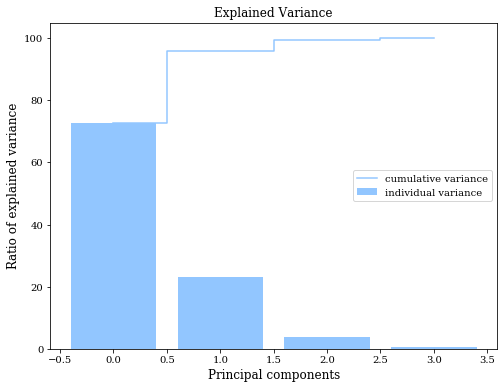

In [105]:
with plt.style.context('seaborn-pastel'):
    g = plt.figure(figsize=(8, 6))
    
    #plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    plt.bar(range(4), var, alpha=1, align='center',
            label='individual variance')
    plt.step(range(4), cum_var, where='mid',
             label='cumulative variance')
    
    plt.title('Explained Variance', fontsize=12)
    plt.ylabel('Ratio of explained variance', fontsize=12)
    plt.xlabel('Principal components', fontsize=12)
    plt.legend(loc='best')
    
    g.savefig("exp_var.pdf", bbox_inches='tight')

The plot above shows that most of the variance (around 73%) can be attributed to the first principal component. The second principal component still holds some information (around 23%), however there is a steep drop-off in the amount of information that can be attributed to each principal components, once you get to the last two components. This means that the third and fourth components can be removed, while still retaining around 96% of the original information.

# PCA Projection  to 2D

In order to project the data onto a new subspace, we need to construct a $4 \times 2$ matrix, which consists of the top $2$ eigenvectors. We can obtain these eigenvectors from first two columns of the matrix u when we performed SVD on the original data matrix. The projection matrix will be denoted by $\mathbf{W}$.

In [46]:
a = np.array([-u[0][0], u[0][1]])
b = np.array([-u[1][0], u[1][1]])
c = np.array([-u[2][0], u[2][1]])
d = np.array([-u[3][0], u[3][1]])

w_matrix = np.stack((a,b,c,d))

print("Matrix W:\n", w_matrix)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


The final step to transform the data onto the new subspace is multiply the standardised data matrix $\mathbf{X}$ by the projection matrix $\mathbf{W}$ to obtain the transformed data matrix $\mathbf{Y}$.

In [47]:
Y = X_std.dot(w_matrix)

Here is a table that shows the last five data entries and their respective values relative to the principal components.

In [86]:
principalDf = pd.DataFrame(data = Y
             , columns = ['first principal component', 'second principal component'])
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.tail()

,first principal component,second principal component,class
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica
149,0.959299,0.022284,Iris-virginica


In [88]:
with open('2D_pc.tex', 'w') as tf:
     tf.write(principalDf.to_latex())

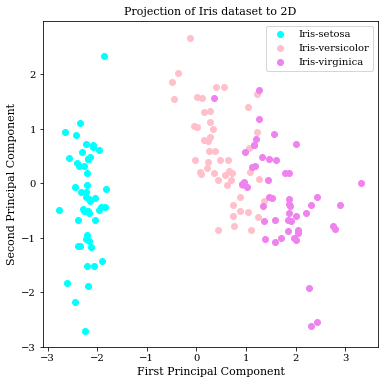

In [103]:
with plt.style.context('seaborn-pastel'):
    
    f = plt.figure(figsize=(6, 6))
    plt.rc('font', family='serif')
    
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['cyan', 'pink', 'violet']
    for lab, col in zip(classes, colors):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
        
    plt.title('Projection of Iris dataset to 2D', fontsize=11)
    plt.xlabel('First Principal Component', fontsize=11)
    plt.ylabel('Second Principal Component', fontsize=11)
    plt.legend(loc='best')
    
    plt.show()
    
    f.savefig("Iris_2D.pdf", bbox_inches='tight')

# Reconstructing Original Dataset

We will conduct PCA on the Iris dataset and then reconstruct it using the first two principal components.

In [50]:
mu = np.mean(X, axis=0)
pca = PCA(n_components=2)
Y_pca = pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

We will then check the reconstruction of the first datapoint, which is:

In [51]:
print([5.1, 3.5, 1.4, 0.2])

[5.1, 3.5, 1.4, 0.2]


In [52]:
print(Xhat[0,])

[5.08718247 3.51315614 1.4020428  0.21105556]


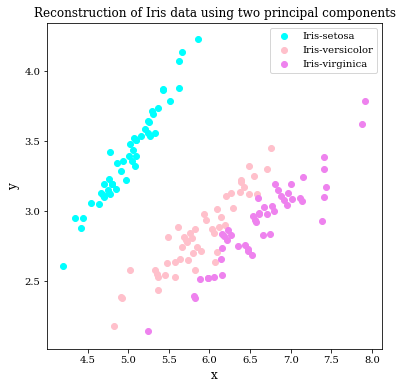

In [106]:
with plt.style.context('seaborn-pastel'):
    h = plt.figure(figsize=(6, 6))
    plt.rc('font', family='serif')
    
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['cyan', 'pink', 'violet']
    for lab, col in zip(classes, colors):
        plt.scatter(Xhat[y==lab, 0],
                    Xhat[y==lab, 1],
                    label=lab,
                    c=col)
    
    plt.title('Reconstruction of Iris data using two principal components', fontsize=12)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend(loc='best')
    
    plt.show()
    
    h.savefig("Iris_recon.pdf", bbox_inches='tight')

The variation along two of the eigenvectors has been kept, but the variation along the other two components has been removed from the dataset.

# Using scikit-learn PCA

In [54]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(X_std)

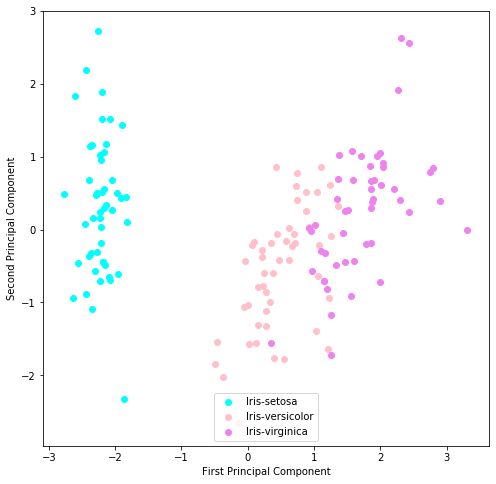

In [55]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(8, 8))
    
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['cyan', 'pink', 'violet']
    for lab, col in zip(classes, colors):
        plt.scatter(Y_pca[y==lab, 0],
                    Y_pca[y==lab, 1],
                    label=lab,
                    c=col)
        
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend(loc='lower center')
    
    plt.show()